# **Building Audio Vectors**

In [ ]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

<ipython-input-6-959b527867bf>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [ ]:
print(librosa.__version__)


0.8.0


In [ ]:
# !pip install librosa==0.8.0

In [ ]:
file_path = '/content/drive/MyDrive/535/IEMOCAP_full_release/Session1/dialog/wav/Ses01F_impro01.wav'

y, sr = librosa.load(file_path, sr=44100)
y, sr

(array([ 0.4256729 ,  0.4850127 ,  0.3723262 , ..., -0.31710678,
        -0.16457509,  0.        ], dtype=float32), 44100)

In [ ]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/MyDrive/535/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/MyDrive/535/IEMOCAP_full_release/'

In [ ]:
sr = 44100
audio_vectors = {}
#for sess in [5]:  # using one session due to memory constraint, can replace [5] with range(1, 6)
for sess in range(1,4):   
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('/content/drive/MyDrive/535/pre-processed/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

  2%|▏         | 1/56 [00:13<11:59, 13.08s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  4%|▎         | 2/56 [00:14<05:41,  6.33s/it]

An exception occured for ._Ses01M_impro06.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  5%|▌         | 3/56 [00:15<03:10,  3.59s/it]

An exception occured for ._Ses01M_script02_2.wav


  7%|▋         | 4/56 [00:56<16:07, 18.61s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  9%|▉         | 5/56 [00:56<10:11, 11.99s/it]

An exception occured for ._Ses01F_script01_1.wav


 12%|█▎        | 7/56 [01:33<12:27, 15.27s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 14%|█▍        | 8/56 [01:33<08:23, 10.49s/it]

An exception occured for ._Ses01F_script03_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 16%|█▌        | 9/56 [01:34<05:42,  7.30s/it]

An exception occured for ._Ses01M_script01_1.wav


 20%|█▉        | 11/56 [02:06<08:37, 11.51s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 21%|██▏       | 12/56 [02:07<05:55,  8.09s/it]

An exception occured for ._Ses01M_impro02.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 23%|██▎       | 13/56 [02:07<04:05,  5.71s/it]

An exception occured for ._Ses01M_script01_3.wav


 27%|██▋       | 15/56 [02:38<06:50, 10.02s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 29%|██▊       | 16/56 [02:38<04:43,  7.08s/it]

An exception occured for ._Ses01M_impro03.wav


 30%|███       | 17/56 [02:47<04:54,  7.55s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 32%|███▏      | 18/56 [02:47<03:23,  5.36s/it]

An exception occured for ._Ses01F_script01_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 34%|███▍      | 19/56 [02:47<02:21,  3.83s/it]

An exception occured for ._Ses01M_script01_2.wav


 36%|███▌      | 20/56 [02:55<02:55,  4.86s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 38%|███▊      | 21/56 [02:55<02:01,  3.48s/it]

An exception occured for ._Ses01F_impro06.wav


 39%|███▉      | 22/56 [03:13<04:33,  8.03s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 41%|████      | 23/56 [03:14<03:08,  5.70s/it]

An exception occured for ._Ses01M_impro01.wav


 45%|████▍     | 25/56 [03:35<04:25,  8.55s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 46%|████▋     | 26/56 [03:35<03:01,  6.06s/it]

An exception occured for ._Ses01F_script03_1.wav


 48%|████▊     | 27/56 [03:58<05:23, 11.16s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 50%|█████     | 28/56 [03:58<03:41,  7.89s/it]

An exception occured for ._Ses01F_script02_2.wav


 52%|█████▏    | 29/56 [04:07<03:37,  8.05s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 54%|█████▎    | 30/56 [04:07<02:28,  5.72s/it]

An exception occured for ._Ses01M_impro04.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 55%|█████▌    | 31/56 [04:07<01:42,  4.10s/it]

An exception occured for ._Ses01F_impro03.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 57%|█████▋    | 32/56 [04:08<01:11,  2.96s/it]

An exception occured for ._Ses01F_script02_1.wav


 62%|██████▎   | 35/56 [04:36<02:19,  6.65s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 64%|██████▍   | 36/56 [04:37<01:34,  4.73s/it]

An exception occured for ._Ses01F_impro01.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 66%|██████▌   | 37/56 [04:37<01:04,  3.39s/it]

An exception occured for ._Ses01M_script03_1.wav


 70%|██████▉   | 39/56 [04:59<02:00,  7.07s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 71%|███████▏  | 40/56 [04:59<01:20,  5.03s/it]

An exception occured for ._Ses01M_impro05.wav


 73%|███████▎  | 41/56 [05:11<01:44,  7.00s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 75%|███████▌  | 42/56 [05:11<01:09,  4.98s/it]

An exception occured for ._Ses01F_impro05.wav


 77%|███████▋  | 43/56 [05:22<01:28,  6.78s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 79%|███████▊  | 44/56 [05:23<00:57,  4.82s/it]

An exception occured for ._Ses01F_impro02.wav


 80%|████████  | 45/56 [05:38<01:28,  8.05s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 82%|████████▏ | 46/56 [05:38<00:57,  5.72s/it]

An exception occured for ._Ses01M_script03_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 84%|████████▍ | 47/56 [05:39<00:36,  4.09s/it]

An exception occured for ._Ses01F_script01_3.wav


 86%|████████▌ | 48/56 [06:03<01:22, 10.30s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 88%|████████▊ | 49/56 [06:04<00:51,  7.29s/it]

An exception occured for ._Ses01F_impro07.wav


 89%|████████▉ | 50/56 [06:10<00:41,  6.91s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 91%|█████████ | 51/56 [06:10<00:24,  4.91s/it]

An exception occured for ._Ses01M_script02_1.wav


 95%|█████████▍| 53/56 [06:40<00:28,  9.46s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 96%|█████████▋| 54/56 [06:40<00:13,  6.71s/it]

An exception occured for ._Ses01F_impro04.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 98%|█████████▊| 55/56 [06:40<00:04,  4.81s/it]

An exception occured for ._Ses01M_impro07.wav


  0%|          | 0/62 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  2%|▏         | 1/62 [00:00<00:19,  3.12it/s]

An exception occured for ._Ses02M_impro01.wav


  3%|▎         | 2/62 [00:07<04:22,  4.37s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  5%|▍         | 3/62 [00:07<02:29,  2.53s/it]

An exception occured for ._Ses02F_script03_2.wav


  8%|▊         | 5/62 [00:36<08:47,  9.25s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 10%|▉         | 6/62 [00:36<05:47,  6.20s/it]

An exception occured for ._Ses02F_impro05.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 11%|█▏        | 7/62 [00:36<03:53,  4.25s/it]

An exception occured for ._Ses02M_script03_1.wav


 13%|█▎        | 8/62 [00:49<06:20,  7.06s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 15%|█▍        | 9/62 [00:50<04:21,  4.94s/it]

An exception occured for ._Ses02F_impro08.wav


 16%|█▌        | 10/62 [01:02<06:11,  7.14s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 18%|█▊        | 11/62 [01:02<04:16,  5.04s/it]

An exception occured for ._Ses02F_script01_1.pk


 19%|█▉        | 12/62 [01:12<05:26,  6.53s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 21%|██        | 13/62 [01:12<03:47,  4.64s/it]

An exception occured for ._Ses02F_impro03.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 23%|██▎       | 14/62 [01:12<02:40,  3.34s/it]

An exception occured for Ses02F_script01_1.pk


 24%|██▍       | 15/62 [01:20<03:40,  4.68s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 26%|██▌       | 16/62 [01:20<02:33,  3.35s/it]

An exception occured for ._Ses02M_impro03.wav


 27%|██▋       | 17/62 [01:33<04:28,  5.97s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 29%|██▉       | 18/62 [01:33<03:07,  4.26s/it]

An exception occured for ._Ses02M_impro06.wav


 32%|███▏      | 20/62 [01:59<06:10,  8.81s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 34%|███▍      | 21/62 [01:59<04:16,  6.25s/it]

An exception occured for ._Ses02F_impro04.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 35%|███▌      | 22/62 [02:00<03:00,  4.50s/it]

An exception occured for ._Ses02F_impro06.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 37%|███▋      | 23/62 [02:00<02:06,  3.24s/it]

An exception occured for ._Ses02F_script03_1.wav


 39%|███▊      | 24/62 [02:11<03:28,  5.50s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 40%|████      | 25/62 [02:11<02:25,  3.92s/it]

An exception occured for ._Ses02F_script02_1.wav


 44%|████▎     | 27/62 [02:43<05:54, 10.13s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 45%|████▌     | 28/62 [02:43<04:03,  7.17s/it]

An exception occured for ._Ses02M_script01_3.wav


 47%|████▋     | 29/62 [02:53<04:27,  8.10s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 48%|████▊     | 30/62 [02:53<03:04,  5.75s/it]

An exception occured for ._Ses02F_impro07.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 50%|█████     | 31/62 [02:54<02:07,  4.12s/it]

An exception occured for ._Ses02F_script01_2.wav


 52%|█████▏    | 32/62 [03:09<03:40,  7.34s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 53%|█████▎    | 33/62 [03:09<02:31,  5.22s/it]

An exception occured for ._Ses02M_script02_1.wav


 55%|█████▍    | 34/62 [03:15<02:34,  5.50s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 56%|█████▋    | 35/62 [03:15<01:46,  3.94s/it]

An exception occured for ._Ses02F_script01_3.wav


 60%|█████▉    | 37/62 [03:49<04:21, 10.45s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 61%|██████▏   | 38/62 [03:49<02:57,  7.39s/it]

An exception occured for ._Ses02F_impro02.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 63%|██████▎   | 39/62 [03:50<02:01,  5.28s/it]

An exception occured for ._Ses02M_script02_2.wav


 66%|██████▌   | 41/62 [04:16<03:31, 10.05s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 68%|██████▊   | 42/62 [04:17<02:22,  7.12s/it]

An exception occured for ._Ses02M_script01_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 69%|██████▉   | 43/62 [04:17<01:36,  5.06s/it]

An exception occured for ._Ses02M_impro07.wav


 71%|███████   | 44/62 [04:27<01:57,  6.51s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 73%|███████▎  | 45/62 [04:27<01:18,  4.64s/it]

An exception occured for ._Ses02M_impro02.wav


 76%|███████▌  | 47/62 [04:47<01:51,  7.45s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 77%|███████▋  | 48/62 [04:47<01:14,  5.29s/it]

An exception occured for ._Ses02M_impro04.wav


 79%|███████▉  | 49/62 [05:06<02:00,  9.31s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 81%|████████  | 50/62 [05:06<01:19,  6.61s/it]

An exception occured for ._Ses02F_script01_1.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 82%|████████▏ | 51/62 [05:07<00:52,  4.73s/it]

An exception occured for ._Ses02F_script02_2.wav


 84%|████████▍ | 52/62 [05:26<01:30,  9.06s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 85%|████████▌ | 53/62 [05:26<00:57,  6.42s/it]

An exception occured for ._Ses02M_impro08.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 87%|████████▋ | 54/62 [05:26<00:36,  4.57s/it]

An exception occured for ._Ses02M_script03_2.wav


 92%|█████████▏| 57/62 [05:59<00:43,  8.75s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


An exception occured for ._Ses02M_impro05.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 95%|█████████▌| 59/62 [06:00<00:14,  4.81s/it]

An exception occured for ._Ses02M_script01_1.wav


 98%|█████████▊| 61/62 [06:27<00:08,  8.30s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
100%|██████████| 62/62 [06:27<00:00,  6.25s/it]


An exception occured for ._Ses02F_impro01.wav


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  2%|▏         | 1/64 [00:00<00:20,  3.05it/s]

An exception occured for ._Ses03F_script02_1.wav


  3%|▎         | 2/64 [00:29<17:46, 17.19s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  5%|▍         | 3/64 [00:29<09:38,  9.48s/it]

An exception occured for ._Ses03M_script03_2.wav


  8%|▊         | 5/64 [01:03<13:39, 13.90s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
  9%|▉         | 6/64 [01:04<08:57,  9.26s/it]

An exception occured for ._Ses03F_impro02.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 11%|█         | 7/64 [01:04<06:01,  6.35s/it]

An exception occured for ._Ses03M_impro05b.wav


 12%|█▎        | 8/64 [01:16<07:34,  8.12s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 14%|█▍        | 9/64 [01:16<05:11,  5.67s/it]

An exception occured for ._Ses03M_impro08a.wav


 17%|█▋        | 11/64 [01:40<07:46,  8.81s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 19%|█▉        | 12/64 [01:40<05:23,  6.22s/it]

An exception occured for ._Ses03M_impro08b.wav


 20%|██        | 13/64 [01:48<05:37,  6.61s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 22%|██▏       | 14/64 [01:48<03:55,  4.71s/it]

An exception occured for ._Ses03M_impro01.wav


 23%|██▎       | 15/64 [02:05<06:52,  8.42s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 25%|██▌       | 16/64 [02:05<04:46,  5.97s/it]

An exception occured for ._Ses03M_script02_1.wav


 27%|██▋       | 17/64 [02:18<06:07,  7.82s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 28%|██▊       | 18/64 [02:18<04:15,  5.55s/it]

An exception occured for ._Ses03F_impro06.wav


 30%|██▉       | 19/64 [02:38<07:28,  9.96s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 31%|███▏      | 20/64 [02:38<05:10,  7.05s/it]

An exception occured for ._Ses03M_script01_1.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 33%|███▎      | 21/64 [02:39<03:35,  5.01s/it]

An exception occured for ._Ses03F_impro01.wav


 36%|███▌      | 23/64 [03:03<06:20,  9.28s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 38%|███▊      | 24/64 [03:03<04:23,  6.58s/it]

An exception occured for ._Ses03F_script01_3.wav


 39%|███▉      | 25/64 [03:28<07:53, 12.14s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 41%|████      | 26/64 [03:28<05:26,  8.58s/it]

An exception occured for ._Ses03M_script02_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 42%|████▏     | 27/64 [03:29<03:45,  6.10s/it]

An exception occured for ._Ses03M_impro04.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 44%|████▍     | 28/64 [03:29<02:36,  4.35s/it]

An exception occured for ._Ses03M_impro07.wav


 50%|█████     | 32/64 [04:05<04:07,  7.74s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 52%|█████▏    | 33/64 [04:06<02:50,  5.51s/it]

An exception occured for ._Ses03F_script01_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 53%|█████▎    | 34/64 [04:06<01:58,  3.96s/it]

An exception occured for ._Ses03M_script01_2.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 55%|█████▍    | 35/64 [04:06<01:23,  2.87s/it]

An exception occured for ._Ses03F_impro07.wav


 58%|█████▊    | 37/64 [04:28<03:03,  6.80s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 59%|█████▉    | 38/64 [04:28<02:05,  4.84s/it]

An exception occured for ._Ses03M_impro06.wav


 61%|██████    | 39/64 [04:41<02:59,  7.20s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 62%|██████▎   | 40/64 [04:41<02:02,  5.12s/it]

An exception occured for ._Ses03M_impro03.wav


 64%|██████▍   | 41/64 [04:50<02:24,  6.30s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 66%|██████▌   | 42/64 [04:50<01:38,  4.49s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 67%|██████▋   | 43/64 [04:50<01:06,  3.17s/it]

An exception occured for ._Ses03F_impro08.wav
An exception occured for ._Ses03F_script01_1.wav


 69%|██████▉   | 44/64 [05:11<02:47,  8.40s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 70%|███████   | 45/64 [05:11<01:53,  5.96s/it]

An exception occured for ._Ses03F_impro05.wav


 72%|███████▏  | 46/64 [05:20<02:02,  6.82s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 73%|███████▎  | 47/64 [05:20<01:22,  4.86s/it]

An exception occured for ._Ses03F_impro04.wav


 77%|███████▋  | 49/64 [05:40<01:55,  7.69s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 78%|███████▊  | 50/64 [05:41<01:16,  5.47s/it]

An exception occured for ._Ses03M_script03_1.wav


 80%|███████▉  | 51/64 [05:53<01:35,  7.38s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 81%|████████▏ | 52/64 [05:53<01:03,  5.25s/it]

An exception occured for ._Ses03F_impro03.wav


/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 83%|████████▎ | 53/64 [05:53<00:41,  3.76s/it]

An exception occured for ._Ses03F_script03_1.wav


 86%|████████▌ | 55/64 [06:17<01:11,  7.99s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 88%|████████▊ | 56/64 [06:17<00:45,  5.68s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 89%|████████▉ | 57/64 [06:17<00:28,  4.01s/it]

An exception occured for ._Ses03M_impro02.wav
An exception occured for ._Ses03M_script01_3.wav


 91%|█████████ | 58/64 [06:36<00:50,  8.41s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 92%|█████████▏| 59/64 [06:36<00:29,  5.96s/it]

An exception occured for ._Ses03M_impro05a.wav


 95%|█████████▌| 61/64 [07:12<00:37, 12.39s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 97%|█████████▋| 62/64 [07:12<00:17,  8.77s/it]

An exception occured for ._Ses03F_script02_2.wav


 98%|█████████▊| 63/64 [07:27<00:10, 10.53s/it]/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
100%|██████████| 64/64 [07:27<00:00,  6.99s/it]


An exception occured for ._Ses03F_script03_2.wav


# **Extract Audio Features**

In [ ]:
import os
import pickle
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import librosa
import math
import random
import pandas as pd
import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

<ipython-input-6-4a4af1db839d>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [ ]:
data_dir = '/content/drive/MyDrive/535/pre-processed/'
labels_df_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_1.pkl'.format(data_dir)
labels_df = pd.read_csv(labels_df_path)
audio_vectors = pickle.load(open(audio_vectors_path, 'rb'))
random_file_name = list(audio_vectors.keys())[random.choice(range(len(audio_vectors.keys())))]
y = audio_vectors[random_file_name]
sr = 44100
plt.figure(figsize=(15,2))


<Figure size 1080x144 with 0 Axes>

<Figure size 1080x144 with 0 Axes>

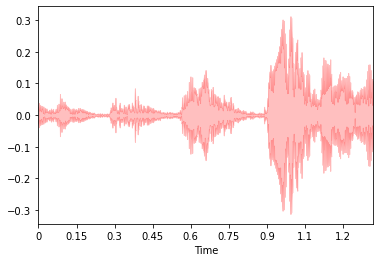

In [ ]:
librosa.display.waveplot(y, sr=sr, max_sr=1000, alpha=0.25, color='r')


In [ ]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.5f}'.format(np.std(y)))


Signal mean = 0.02464
Signal std dev = 0.04236


RMSE mean = 0.03086
RMSE std dev = 0.02884


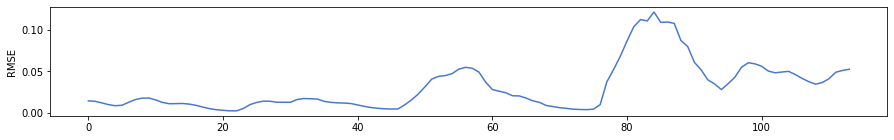

In [ ]:
# rmse = librosa.feature.rmse(y + 0.0001)[0]
rmse = librosa.feature.rms(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.5f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.5f}'.format(np.std(rmse)))


In [ ]:
from IPython.display import Audio
Audio(y, rate=44100)

In [ ]:
silence = 0
for e in rmse:
    if e <= 0.4 * np.mean(rmse):
        silence += 1
print(silence/float(len(rmse)))



0.32456140350877194


In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
np.mean(y_harmonic)


5.861487e-06

In [ ]:
autocorr = librosa.core.autocorrelate(y)
np.max(autocorr)

104.45204314713538

In [ ]:
cl = 0.45 * np.mean(abs(y))
center_clipped = []
for s in y:
    if s >= cl:
        center_clipped.append(s - cl)
    elif s <= -cl:
        center_clipped.append(s + cl)
    elif np.abs(s) < cl:
        center_clipped.append(0)
new_autocorr = librosa.core.autocorrelate(np.array(center_clipped))
np.max(new_autocorr)

78.27869175306202

In [ ]:
columns = ['wav_file', 'label', 'sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std']
df_features = pd.DataFrame(columns=columns)


In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

data_dir = '/content/drive/MyDrive/535/pre-processed/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)


In [ ]:
labels_df = pd.read_csv(labels_path)

# for sess in [5]:
for sess in range(1,4):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]

                feature_list = [wav_file_name, label]  # wav_file, label
                sig_mean = np.mean(abs(y))
                feature_list.append(sig_mean)  # sig_mean
                feature_list.append(np.std(y))  # sig_std

                rmse = librosa.feature.rms(y + 0.0001)[0]
                feature_list.append(np.mean(rmse))  # rmse_mean
                feature_list.append(np.std(rmse))  # rmse_std

                silence = 0
                for e in rmse:
                    if e <= 0.4 * np.mean(rmse):
                        silence += 1
                silence /= float(len(rmse))
                feature_list.append(silence)  # silence

                y_harmonic = librosa.effects.hpss(y)[0]
                feature_list.append(np.mean(y_harmonic) * 1000)  # harmonic (scaled by 1000)

                # based on the pitch detection algorithm mentioned here:
                # http://access.feld.cvut.cz/view.php?cisloclanku=2009060001
                cl = 0.45 * sig_mean
                center_clipped = []
                for s in y:
                    if s >= cl:
                        center_clipped.append(s - cl)
                    elif s <= -cl:
                        center_clipped.append(s + cl)
                    elif np.abs(s) < cl:
                        center_clipped.append(0)
                auto_corrs = librosa.core.autocorrelate(np.array(center_clipped))
                feature_list.append(1000 * np.max(auto_corrs)/len(auto_corrs))  # auto_corr_max (scaled by 1000)
                feature_list.append(np.std(auto_corrs))  # auto_corr_std

                df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
            except:
                print('Some exception occured')

df_features.to_csv('/content/drive/MyDrive/535/pre-processed/audio_features.csv', index=False)


0it [00:00, ?it/s]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
1it [00:03,  3.17s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
2it [00:05,  2.71s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
3it [00:13,  5.19s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is depr

Some exception occured


Streaming output truncated to the last 5000 lines.
1494it [1:04:32,  1.87s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
1495it [1:04:37,  2.78s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
1496it [1:04:38,  2.25s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
1497it [1:04:45,  3.81s/it]<ipytho

Some exception occured


<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
364it [14:31,  2.33s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
365it [14:33,  2.18s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
366it [14:34,  1.96s/it]<ipython-input-18-02b012ba0696>:46: FutureWarning: The frame.append method is deprecated and w

# **Prepare Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/535/pre-processed/audio_features.csv')
df = df[df['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df.shape)
display(df.head())

# change 7 to 2
df['label'] = df['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df.head()


(4339, 10)


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_impro07_F000,2,0.086094,0.158693,0.105056,0.118906,0.419580,0.025831,19.588194,66.725601
2,Ses01F_impro07_F002,2,0.027800,0.049798,0.035015,0.035379,0.388247,-0.005208,1.902493,6.873985
3,Ses01F_impro07_F003,2,0.065685,0.118323,0.080160,0.086733,0.424390,-0.018977,10.779712,19.421214
4,Ses01F_impro07_F004,2,0.018342,0.029579,0.022904,0.018692,0.169935,-0.002519,0.629408,2.469413
5,Ses01F_impro07_F005,2,0.101390,0.155746,0.125231,0.092295,0.217391,-0.145875,16.748854,22.718427


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_impro07_F000,1,0.086094,0.158693,0.105056,0.118906,0.419580,0.025831,19.588194,66.725601
2,Ses01F_impro07_F002,1,0.027800,0.049798,0.035015,0.035379,0.388247,-0.005208,1.902493,6.873985
3,Ses01F_impro07_F003,1,0.065685,0.118323,0.080160,0.086733,0.424390,-0.018977,10.779712,19.421214
4,Ses01F_impro07_F004,1,0.018342,0.029579,0.022904,0.018692,0.169935,-0.002519,0.629408,2.469413
5,Ses01F_impro07_F005,1,0.101390,0.155746,0.125231,0.092295,0.217391,-0.145875,16.748854,22.718427


In [ ]:
df.to_csv('/content/drive/MyDrive/535/pre-processed/no_sample_df.csv')

# oversample fear
fear_df = df[df['label']==3]
for i in range(30):
    df = df.append(fear_df)

sur_df = df[df['label']==4]
for i in range(10):
    df = df.append(sur_df)
    
df.to_csv('/content/drive/MyDrive/535/pre-processed/modified_df.csv')


<ipython-input-3-b57cb9bd3744>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fear_df)
<ipython-input-3-b57cb9bd3744>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fear_df)
<ipython-input-3-b57cb9bd3744>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fear_df)
<ipython-input-3-b57cb9bd3744>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fear_df)
<ipython-input-3-b57cb9bd3744>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fear_df)
<ipython-input-3-b57cb9bd3744>:6: F

In [ ]:
# emotion_dict = {'ang': 0,
#                 'hap': 1,
#                 'sad': 2,
#                 'neu': 3,}

emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

scalar = MinMaxScaler()
df[df.columns[2:]] = scalar.fit_transform(df[df.columns[2:]])
df.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_impro07_F000,1,0.300239,0.420359,0.301680,0.651888,0.551931,0.175273,0.237052,0.235874
2,Ses01F_impro07_F002,1,0.095565,0.130547,0.099146,0.193549,0.510714,0.169199,0.023020,0.024297
3,Ses01F_impro07_F003,1,0.228580,0.312918,0.229688,0.475346,0.558258,0.166505,0.130452,0.068652
4,Ses01F_impro07_F004,1,0.062358,0.076738,0.064122,0.101983,0.223538,0.169725,0.007613,0.008727
5,Ses01F_impro07_F005,1,0.353945,0.412518,0.360022,0.505867,0.285964,0.141671,0.202691,0.080308


In [ ]:
x_train, x_test = train_test_split(df, test_size=0.20)

x_train.to_csv('/content/drive/MyDrive/535/data/s2e/audio_train.csv', index=False)
x_test.to_csv('/content/drive/MyDrive/535/data/s2e/audio_test.csv', index=False)

print(x_train.shape, x_test.shape)

(4583, 10) (1146, 10)


In [ ]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


In [ ]:
import re
import os
import pickle
import chardet

useful_regex = re.compile(r'^(\w+)', re.IGNORECASE)

file2transcriptions = {}

# for sess in [5]:
for sess in range(1, 4):
    transcripts_path = '/content/drive/MyDrive/Temp/IEMOCAP_full_release/Session{}/dialog/transcriptions/'.format(sess)
    transcript_files = os.listdir(transcripts_path)
    for f in transcript_files:
        with open('{}{}'.format(transcripts_path, f), 'r', encoding='utf-8', errors='replace') as f:
            all_lines = f.readlines()

        for l in all_lines:
            match = useful_regex.match(l)
            if match:  # Check if there is a match
                audio_code = match.group()
                transcription = l.split(':')[-1].strip()
                file2transcriptions[audio_code] = transcription

with open('/content/drive/MyDrive/535/data/t2e/audiocode2text.pkl', 'wb') as file:
    pickle.dump(file2transcriptions, file)

len(file2transcriptions)

5790

In [ ]:
audiocode2text = pickle.load(open('/content/drive/MyDrive/535/data/t2e/audiocode2text.pkl', 'rb'))


In [ ]:
# Prepare text data
text_train = pd.DataFrame()
text_train['wav_file'] = x_train['wav_file']
text_train['label'] = x_train['label']
text_train['transcription'] = [normalizeString(audiocode2text[code]) for code in x_train['wav_file']]

text_test = pd.DataFrame()
text_test['wav_file'] = x_test['wav_file']
text_test['label'] = x_test['label']
text_test['transcription'] = [normalizeString(audiocode2text[code]) for code in x_test['wav_file']]

text_train.to_csv('/content/drive/MyDrive/535/data/t2e/text_train.csv', index=False)
text_test.to_csv('/content/drive/MyDrive/535/data/t2e/text_test.csv', index=False)

print(text_train.shape, text_test.shape)


(4583, 3) (1146, 3)


# **Unimodal Text Classification**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline


In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/535/data/s2e/audio_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/535/data/s2e/audio_test.csv')

print(x_train.shape)
y_train = x_train['label']
y_test = x_test['label']


(4583, 10)


In [ ]:
print(x_train.shape, x_test.shape)
cl_weight = dict(pd.Series(x_train['label']).value_counts(normalize=True))
print(dict(pd.Series(x_train['label']).value_counts()))

del x_train['label']
del x_test['label']
del x_train['wav_file']
del x_test['wav_file']

(4583, 10) (1146, 10)
{2: 1345, 5: 869, 1: 703, 4: 625, 3: 562, 0: 479}


In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [ ]:
svc_classifier = LinearSVC()

svc_classifier.fit(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
# Predict
pred = svc_classifier.predict(x_test)

# # Results
display_results(y_test, pred)

with open('/content/drive/MyDrive/535/pred_probas/svc_classifier_model.pkl', 'wb') as f:
     pickle.dump(svc_classifier, f)

(6077058, 1)
(4583,)


Test Set Accuracy =  0.586
Test Set F-score =  0.578
Test Set Precision =  0.595
Test Set Recall =  0.590
Confusion matrix, without normalization
[[ 44  14  49   0   8  12]
 [ 24  48  93   0   4  19]
 [ 26  27 238   2  10  35]
 [  0   0   0 151   0   0]
 [  0   0   0   0 145   0]
 [ 16  11 113   3   8  46]]


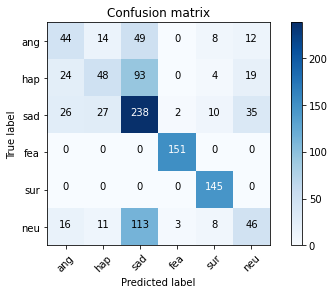

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('/content/drive/MyDrive/535/pred_probas/rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

#**Unimodal Audio Classification**

In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_train.csv')
df = df.append(pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_test.csv'))
display(df.head())


<ipython-input-10-a3e99e6e3e21>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_test.csv'))


,wav_file,label,transcription
0,Ses01F_impro07_F013,1,i would be like oh . right right right .
1,Ses02M_impro07_F004,1,laughter it s gotta be it like
2,Ses01F_script02_2_M039,4,yeah ?
3,Ses02M_impro08_F018,3,so is there any i mean what if they spend some...
4,Ses01F_impro05_M014,5,no no .


In [ ]:
col = ['label', 'transcription']
df = df[col]


In [ ]:
df.columns


Index(['label', 'transcription'], dtype='object')

In [ ]:
df.columns = ['label', 'transcription']
category_to_id = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}
id_to_category = {0: 'ang', 1: 'hap', 2: 'sad', 3: 'fea', 4: 'sur', 5: 'neu'}


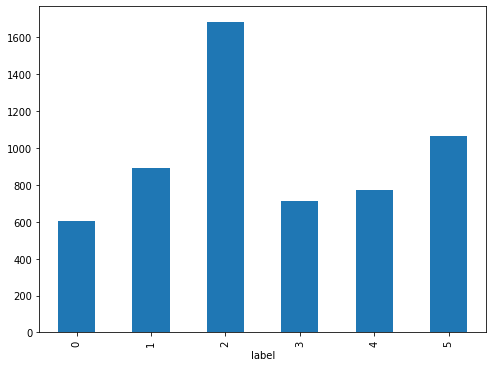

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('label').transcription.count().plot.bar(ylim=0)
plt.show()


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.transcription).toarray()

labels = df.label
print(features.shape)


(5729, 1326)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)


In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)


Test Set Accuracy =  0.622
Test Set F-score =  0.637
Test Set Precision =  0.663
Test Set Recall =  0.624
Confusion matrix, without normalization
[[ 46   5  52   2   5  12]
 [  5 105  45   4   5  18]
 [ 20  25 225   6  14  51]
 [  0   0  21 107   0   0]
 [  0   0  18   3 139   0]
 [  8  18  87   2   7  91]]


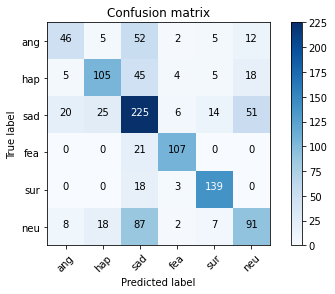

In [ ]:
svc_classifier = LinearSVC()

svc_classifier.fit(x_train, y_train)

# Predict
pred = svc_classifier.predict(x_test)

# Results
one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emotion_dict.keys())
(y_test, pred)

with open('/content/drive/MyDrive/535/pred_probas/text_svc_classifier_model.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)


In [ ]:
# Feature selection
sfm = SelectFromModel(svc_classifier, threshold='median')
sfm.fit(x_train, y_train)

# Select the most important features
x_train_new = sfm.transform(x_train)
x_test_new = sfm.transform(x_test)

print("Number of features before feature selection:", x_train.shape[1])
print("Number of features after feature selection:", x_train_new.shape[1])


ValueError: ignored

#**Multimodal Classification for Text and Audio**

In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


x_train_text = pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_train.csv')
x_test_text = pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_test.csv')

y_train_text = x_train_text['label']
y_test_text = x_test_text['label']

x_train_audio = pd.read_csv('/content/drive/MyDrive/535/data/s2e/audio_train.csv')
x_test_audio = pd.read_csv('/content/drive/MyDrive/535/data/s2e/audio_test.csv')


y_train_audio = x_train_audio['label']
y_test_audio = x_test_audio['label']

y_train = y_train_audio  # since y_train_audio == y_train_text
y_test = y_test_audio  # since y_train_audio == y_train_text

print(x_train_text.shape, y_train_text.shape, x_train_audio.shape, y_train_audio.shape)
x_train_audio

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

id_to_emotion = {0: 'ang', 1: 'hap', 2: 'sad', 3: 'fea', 4: 'sur', 5: 'neu'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)


In [ ]:
cl_weight = dict(pd.Series(x_train_audio['label']).value_counts(normalize=True))


# **Get Text Features**

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features_text = tfidf.fit_transform(x_train_text.append(x_test_text).transcription).toarray()

x_train_text = features_text[:x_train_text.shape[0]]
x_test_text = features_text[-x_test_text.shape[0]:]

print(features_text.shape, x_train_text.shape, x_test_text.shape)


(5729, 1326) (4583, 1326) (1146, 1326)


<ipython-input-7-ed4f8b6293ed>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_text = tfidf.fit_transform(x_train_text.append(x_test_text).transcription).toarray()


# **Combine Text + Audio Features**

In [ ]:
combined_x_train = np.concatenate((np.array(x_train_audio[x_train_audio.columns[2:]]), x_train_text), axis=1)
combined_x_test = np.concatenate((np.array(x_test_audio[x_test_audio.columns[2:]]), x_test_text), axis=1)

print(combined_x_train.shape, combined_x_test.shape)

combined_features_dict = {}

combined_features_dict['x_train'] = combined_x_train
combined_features_dict['x_test'] = combined_x_test
combined_features_dict['y_train'] = np.array(y_train)
combined_features_dict['y_test'] = np.array(y_test)

with open('/content/drive/MyDrive/535/data/combined/combined_features.pkl', 'wb') as f:
    pickle.dump(combined_features_dict, f)


(4583, 1334) (1146, 1334)


Test Set Accuracy =  0.612
Test Set F-score =  0.631
Test Set Precision =  0.658
Test Set Recall =  0.612
Confusion matrix, without normalization
[[ 64   2  30   1   7  23]
 [  5 100  50   2   5  26]
 [ 29  18 224   3   5  59]
 [  0   0  23 122   0   6]
 [  4   0  26   4 109   2]
 [  8  26  74   2   5  82]]


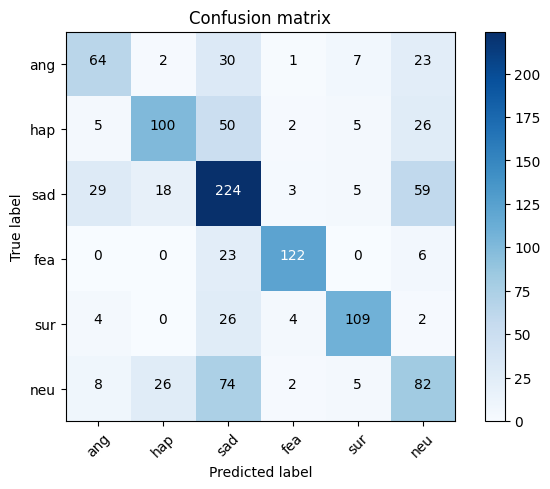

In [ ]:
svc_classifier = LinearSVC()

svc_classifier.fit(combined_x_train, y_train)

# Predict
pred = svc_classifier.predict(combined_x_test)

# Results
one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)
(y_test, pred)

with open('/content/drive/MyDrive/535/pred_probas/combined_svc_classifier_model.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)
    
with open('/content/drive/MyDrive/535/trained_models/combined/SVC.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **GRU Model**

In [ ]:
import pandas as pd
import numpy as np
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Load the dataset
x_train_text = pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_train.csv')
x_test_text = pd.read_csv('/content/drive/MyDrive/535/data/t2e/text_test.csv')
y_train = x_train_text['label']
y_test = x_test_text['label']

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_text['transcription'])
vocab_size = len(tokenizer.word_index) + 1

# Convert text data to sequences
maxlen = 200
x_train_text_seq = tokenizer.texts_to_sequences(x_train_text['transcription'])
x_train_text_seq = pad_sequences(x_train_text_seq, padding='post', maxlen=maxlen)
x_test_text_seq = tokenizer.texts_to_sequences(x_test_text['transcription'])
x_test_text_seq = pad_sequences(x_test_text_seq, padding='post', maxlen=maxlen)

# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_text_seq, tf.keras.utils.to_categorical(y_train, num_classes=6),
                    epochs=25, batch_size=8, validation_data=(x_test_text_seq, tf.keras.utils.to_categorical(y_test, num_classes=6)))

# Evaluate the model performance
_, train_acc = model.evaluate(x_train_text_seq, tf.keras.utils.to_categorical(y_train, num_classes=6), verbose=0)
_, test_acc = model.evaluate(x_test_text_seq, tf.keras.utils.to_categorical(y_test, num_classes=6), verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))


Epoch 1/25
573/573 [==============================] - 153s 256ms/step - loss: 1.7335 - accuracy: 0.2837 - val_loss: 1.6801 - val_accuracy: 0.2949
Epoch 2/25
573/573 [==============================] - 136s 238ms/step - loss: 1.5247 - accuracy: 0.3884 - val_loss: 1.3838 - val_accuracy: 0.4599
Epoch 3/25
573/573 [==============================] - 137s 239ms/step - loss: 1.3378 - accuracy: 0.4615 - val_loss: 1.2652 - val_accuracy: 0.4956
Epoch 4/25
573/573 [==============================] - 136s 237ms/step - loss: 1.2092 - accuracy: 0.5093 - val_loss: 1.1817 - val_accuracy: 0.5113
Epoch 5/25
573/573 [==============================] - 133s 233ms/step - loss: 1.1323 - accuracy: 0.5350 - val_loss: 1.1538 - val_accuracy: 0.5253
Epoch 6/25
573/573 [==============================] - 133s 232ms/step - loss: 1.0744 - accuracy: 0.5586 - val_loss: 1.1477 - val_accuracy: 0.5384
Epoch 7/25
573/573 [==============================] - 133s 232ms/step - loss: 1.0299 - accuracy: 0.5719 - val_loss: 1.1089 -

In [ ]:
y_pred = np.argmax(model.predict(x_test_text_seq), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

36/36 [==============================] - 5s 62ms/step
Confusion Matrix:
 [[ 36   4  33   0   8  46]
 [ 17  84  28   9   9  41]
 [ 22  21 195   3  11  86]
 [  0   0   0 151   0   0]
 [  0   0   0   4 141   0]
 [  9  23  79   0  22  64]]


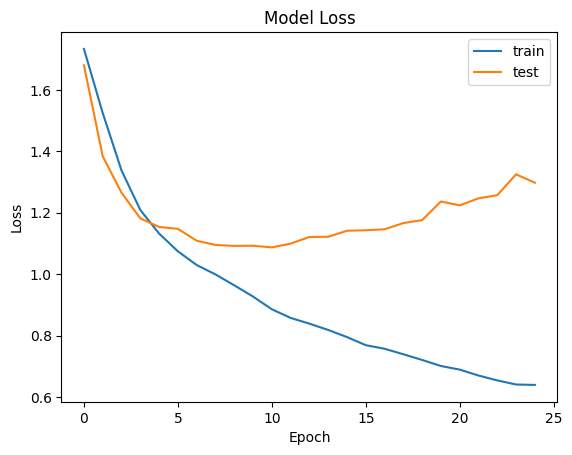

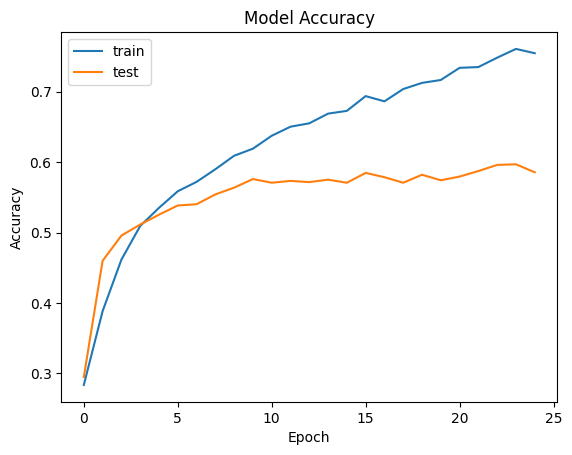

Train Accuracy: 0.794, Test Accuracy: 0.586


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy over time
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model performance
_, train_acc = model.evaluate(x_train_text_seq, tf.keras.utils.to_categorical(y_train, num_classes=6), verbose=0)
_, test_acc = model.evaluate(x_test_text_seq, tf.keras.utils.to_categorical(y_test, num_classes=6), verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

36/36 [==============================] - 4s 118ms/step
Accuracy: 0.5855148342059336
Precision: 0.5825343236530793
Recall: 0.5855148342059336
F1 score: 0.576881380343178


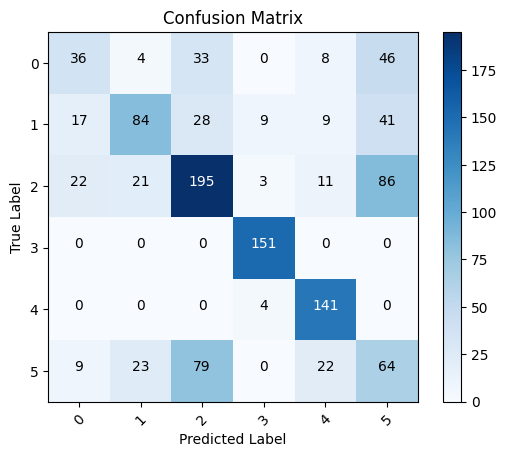

In [ ]:
# Make predictions on test data
y_pred = model.predict(x_test_text_seq)
y_pred = np.argmax(y_pred, axis=1)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, set(y_test), rotation=45)
plt.yticks(tick_marks, set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.show()

# **Ensemble Model**

Test Set Accuracy =  0.637
Test Set F-score =  0.616
Test Set Precision =  0.635
Test Set Recall =  0.613
Confusion matrix, without normalization
[[117  11  81   1   3  11]
 [ 11 175  54   4   8  48]
 [ 30  28 470   2   7  46]
 [  0   0   0 247   0   0]
 [  0   0   3   0 238   0]
 [ 12  42 159   6   7 139]]


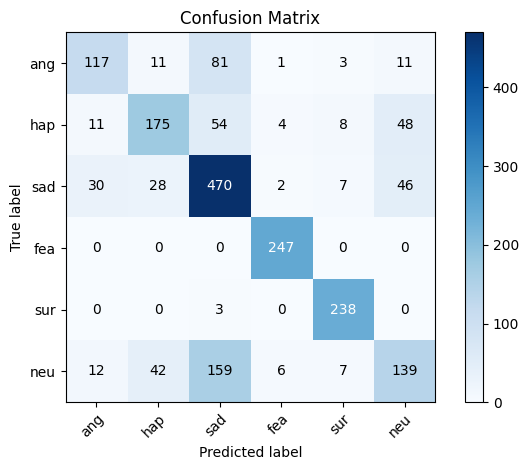

In [ ]:
# Load predicted probabilities
with open('/content/drive/MyDrive/535/data/pred_probas/combined_rf_classifier.pkl', 'rb') as f:
    rf_pred_probs = pickle.load(f)

with open('/content/drive/MyDrive/535/data/pred_probas/combined_xgb_classifier.pkl', 'rb') as f:
    xgb_pred_probs = pickle.load(f)
    
with open('/content/drive/MyDrive/535/data/pred_probas/combined_svc_classifier_model.pkl', 'rb') as f:
    svc_preds = pickle.load(f)
    
with open('/content/drive/MyDrive/535/data/pred_probas/combined_mnb_classifier.pkl', 'rb') as f:
    mnb_pred_probs = pickle.load(f)
    
with open('/content/drive/MyDrive/535/data/pred_probas/combined_mlp_classifier.pkl', 'rb') as f:
    mlp_pred_probs = pickle.load(f)
    
with open('/content/drive/MyDrive/535/data/pred_probas/combined_lr_classifier.pkl', 'rb') as f:
    lr_pred_probs = pickle.load(f)

with open('/content/drive/MyDrive/535/data/pred_probas/combined_lstm_classifier.pkl', 'rb') as f:
    lstm_pred_probs = pickle.load(f)

# Average of the predicted probabilites
ensemble_pred_probs = (xgb_pred_probs +
                       mlp_pred_probs +
                       rf_pred_probs +
                       mnb_pred_probs +
                       lr_pred_probs)/5.0
# Show metrics
display_results(y_test, ensemble_pred_probs)